# Konwolucyjne sieci neuronowe

Dziś spróbujemy stworzyć i wytrenować prostą sieć konwolucyjną do rozpoznawania, co znajduje się na obrazie. Następnie omówimy kwestię identyfikowania obiektów na obrazie oraz porozmawiamy o wykorzystaniu gotowej już sieci.

## Problem klasyfikacji obrazów

Jak się za to zabrać? Naiwnym podejściem byłaby próba ręcznej specyfikacji pewnych cech (niemowlęta mają duże głowy, szczoteczki są długie etc.). Szybko jednak stwierdzilibyśmy, że nawet dla niewielkiego zbioru kategorii jest to tytaniczna praca bez gwarancji sukcesu. Co więcej, istnieje wiele czynników zniekształcających zawartość naszych zdjęć. Obiekty mogą być przedstawiane z różnych ujęć, w różnych warunkach oświetleniowych, w różnej skali, częściowo niewidoczne, ukryte w tle...

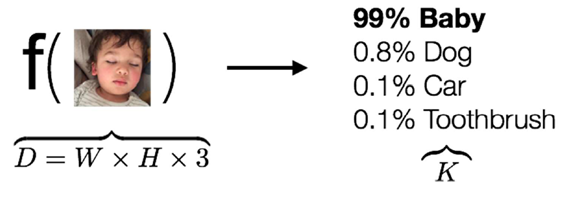


Wszystkie wymienione problemy są skutkiem istnienia semantycznej przepaści między tym, jak reprezentowane są nasze dane wejściowe (tablica liczb), a tym, czego w nich szukamy, czyli kategorii i cech: zwierząt, nosów, głów itp. Zamiast więc próbować samodzielnie napisać funkcję $f(x)$, spróbujemy skorzystać z dobrodziejstw uczenia maszynowego, aby automatycznie skonstruować reprezentację wejścia właściwą dla postawionego sobie zadania (a przynajmniej lepszą od pierwotnej). Tu z pomocą przychodzą nam konwolucyjne sieci neuronowe. Do tego trzeba zrozumieć, czym jest konwolucja (inaczej: splot), a do tego najlepiej nadają się ilustracje, jak to działa.

### Konwolucja

Konwolucja (splot) to działanie określone dla dwóch funkcji, dające w wyniku inną, która może być postrzegana jako zmodyfikowana wersja oryginalnych funkcji.

Z naszego punktu widzenia polega to na tym, że mnożymy odpowiadające sobie elementy z dwóch macierzy: obrazu oraz mniejszej, nazywanej filtrem (lub kernelem). Następnie sumujemy wynik i zapisujemy do macierzy wynikowej na odpowiedniej pozycji. Proces powtarza się aż do momentu przeskanowania całego obrazu. Taki filtr wykrywa, czy coś do niego pasuje w danym miejscu i z tego wynika zdolność semantycznej generalizacji sieci - uczymy się cech, a wykrywamy je potem w dowolnym miejscu. Pod tym linkiem [przydatne pojęcia](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks).

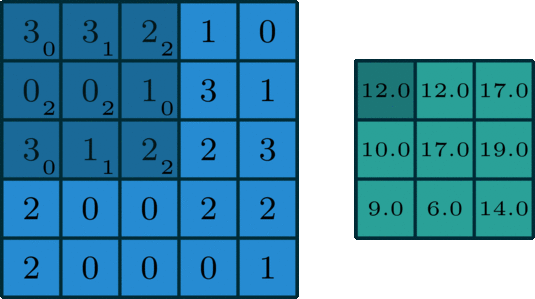

### Stride

Stride to inaczej *krok algorytmu* albo *przesunięcie*. Określa, co ile komórek macierzy następuje aplikacja operatora konwolucji. Jeśli stride wynosi 1, a operator konwolucji ma rozmiar np. 3 x 3, to każdy piksel (z wyjątkiem skrajnych narożnych pikseli) będzie uczestniczył w wielu operacjach konwolucji. Jeśli natomiast krok wyniósłby 3, to każdy piksel uczestniczyłby tylko jednokrotnie w tych operacjach. Należy pamiętać, że krok stosujemy zarówno w poziomie, jak i pionie. Najczęściej w obu kierunkach wykorzystuje się ten sam krok.


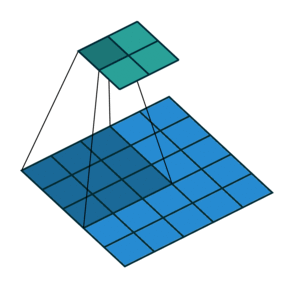



### Padding

Padding to inaczej *wypełnienie* krawędzi obrazu. Określa, w jaki sposób będą traktowane skrajne piksele. Jeśli padding wynosi 0, to skrajne piksele będą uczestniczyły w operacjach konwolucji rzadziej niż pozostałe piksele (oczywiście jest to również uzależnione od wartości kroku). Aby zniwelować ten efekt, możemy dodać wypełnienie wokół całego obrazu. Te dodatkowe piksele mogą być zerami albo mogą być również jakimiś uśrednionymi wartościami pikseli sąsiednich. Wypełnienie zerami oznacza de facto obramowanie całego obrazu czarną ramką. 

[Więcej na temat wypełnienia.](https://www.geeksforgeeks.org/cnn-introduction-to-padding/)

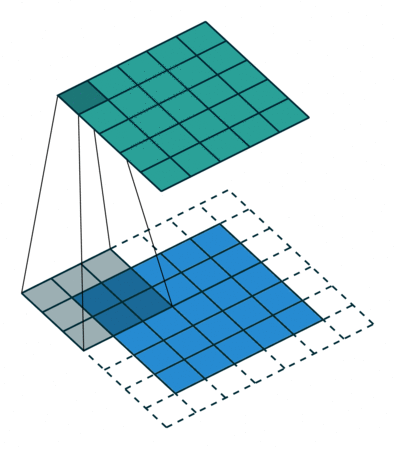

### Pooling

Pooling jest procesem wykorzystywanym do redukcji rozmiaru obrazu. 
Występują 2 warianty: *max-pooling* oraz *avg-pooling*. Pozwala on usunąć zbędne dane, np. jeżeli filtr wykrywa linie, to istnieje spora szansa, że linie te ciągną się przez sąsiednie piksele, więc nie ma powodu powielać tej informacji. Dzięki temu wprowadzamy pewną inwariancję w wagach sieci i jesteśmy odporni na niewielkie wahania lokalizacji informacji, a skupiamy się na "większym obrazie".

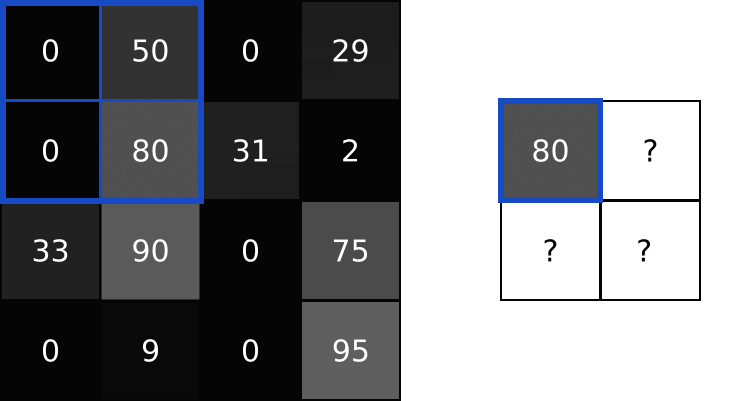

### Sposoby redukcji przeuczenia

* warstwa dropout - wyłączanie losowych neuronów w trakcie uczenia,
* regularyzacja wag - ograniczenie sumy wartości wag,
* metoda wczesnego stopu (early stopping) - zatrzymanie uczenia, jeśli proces uczenia nie poprawia wyników,
* normalizacja paczki (batch normalization) - centrowanie i skalowanie wartości wektorów *w obrębie batcha danych*, 
* rozszerzanie danych (data augmentation) - generowanie lekko zaburzonych danych (na podstawie danych treningowych),
* lub... więcej danych.

### Budowa sieci CNN do klasyfikacji obrazów

Sieć konwolucyjna składa się zawsze najpierw - zgodnie z nazwą - z części konwolucyjnej, której zadaniem jest wyodrębnienie przydatnych cech z obrazu za pomocą filtrów, warstw poolingowych etc.

Warstwa konwolucyjna sieci neuronowej składa się z wielu filtrów konwolucyjnych, działających równolegle (tj. wykrywających różne cechy). Wagi kerneli, początkowo zainicjalizowane losowo, są dostrajane w procesie uczenia. Wynik działania poszczególnych filtrów jest przepuszczany przez funkcję nieliniową. Mamy tu do czynienia z sytuacją analogiczną jak w MLP: najpierw wykonujemy przekształcenie liniowe, a potem stosujemy funkcję aktywacji. Funkcji aktywacji nie stosuje się jednak po warstwach poolingowych, są to stałe operacje nie podlegające uczeniu.

W celu klasyfikacji obrazu musimy później użyć sieci MLP. Jako że wejściem do sieci MLP jest zawsze wektor, a wyjściem warstwy konwolucyjnej obraz, to musimy zatem obraz przetworzony przez filtry konwolucyjne sprowadzić do formy wektora, tzw. **embedding-u / osadzenia**, czyli reprezentacji obrazu jako punktu w pewnej ciągłej przestrzeni. Służy do tego warstwa spłaszczająca (flatten layer), rozwijająca macierze wielowymiarowe na wektor, np $10 \times 10 \times 3$ na $300 \times 1$.

Część konwolucyjna nazywa się często **backbone**, a część MLP do klasyfikacji **head**. Głowa ma zwykle 1-2 warstwy w pełni połączone, z aktywacją softmax w ostatniej warstwie. Czasem jest nawet po prostu pojedynczą warstwą z softmaxem, bo w dużych sieciach konwolucyjnych ekstrakcja cech jest tak dobra, że taka prosta konstrukcja wystacza do klasyfikacji embeddingu.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

Wybierzmy rodzaj akceleracji. Współczesne wersje PyTorch wspierają akcelerację nie tylko na kartach Nvidii i AMD, ale również na procesorach Apple z serii M. Obsługa AMD jest realizowana identycznie jak CUDA, natomiast MPS (Apple) ma nieco inne API do sprawdzania dostępności i wybierania urządzenia. 
Zapisujemy wybrane urządzenie do zmiennej `device`, dzięki czemu w dalszych częściach kodu już nie będziemy musieli o tym myśleć.

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")

print(device)

cuda:0


W pakiecie torchvision mamy funkcje automatycznie pobierające niektóre najbardziej popularne zbiory danych z obrazami. 

W tym ćwiczeniu wykorzystamy zbiór FashionMNIST, który zawiera małe (28x28) zdjęcia ubrań w skali szarości. Zbiór ten został stworzony przez Zalando i jest "modowym" odpowiednikiem "cyferkowego" MNIST-a, jest z nim kompatybilny pod względem rozmiarów i charakterystyki danych, ale jest od MNIST-a trudniejszy w klasyfikacji.

Do funkcji ładujących zbiory danych możemy przekazać przekształcenie, które powinno zostać na nim wykonane. Przekształcenia można łączyć przy użyciu `transforms.Compose`. W tym przypadku przekonwertujemy dane z domyślnej reprezentacji PIL.Image na torchowe tensory.

Pobrany dataset przekazujemy pod kontrolę DataLoader-a, który zajmuje się podawaniem danych w batchach podczas treningu.

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
batch_size = 32

trainset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True
)

testset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=True
)

classes = (
    "top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
)

print(type(testset[0][0]))

<class 'torch.Tensor'>


Zobaczmy, co jest w naszym zbiorze danych. Poniżej kawałek kodu, który wyświetli nam kilka przykładowych obrazków. Wartości pikseli są znormalizowane do przedziału [0,1].

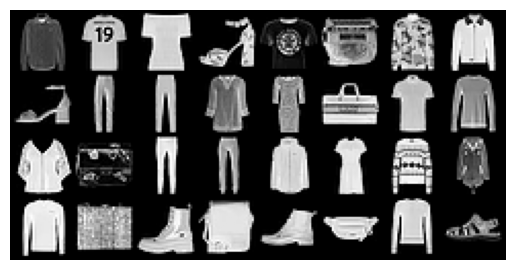

Shirt      top        top        Sandal     top        Bag        Coat       Coat      
Sandal     Trouser    Trouser    Shirt      Dress      Bag        top        Pullover  
Shirt      Bag        Trouser    Trouser    Coat       Dress      Pullover   Coat      
Pullover   Bag        Ankle boot Bag        Ankle boot Bag        Pullover   Sandal    


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

def grid_show(images, nrow = 8):
    imshow(torchvision.utils.make_grid(images, nrow=nrow))

def print_grid(labels, nrow = 8):
    rows = [labels[n : n + nrow] for n in range(0, len(labels), nrow)]
    for r in rows:
        print(" ".join(f"{classes[c]:10s}" for c in r))

grid_show(images)
print_grid(labels)

## LeNet

LeNet to bardzo znany, klasyczny model sieci konwolucyjnej.

Warstwy:
- obraz,
- konwolucja, kernel $5 \times 5$, bez paddingu, 6 kanałów (feature maps),
- average pooling, kernel $2 \times 2$, stride 2,
- konwolucja, kernel $5 \times 5$, bez paddingu, 16 kanałów (feature maps),
- average pooling, kernel $2 \times 2$, stride 2,
- warstwa w pełni połączona, 120 neuronów na wyjściu,
- warstwa w pełni połączona, 84 neurony na wyjściu,
- warstwa w pełni połączona, na wyjściu tyle neuronów, ile jest klas.

### Zadanie 1 (2 punkty)

Zaimplementuj wyżej opisaną sieć, używając biblioteki PyTorch. Wprowadzimy sobie jednak pewne modyfikacje, żeby było ciekawiej:
- w pierwszej warstwie konwolucyjnej użyj 20 kanałów (feature maps),
- w drugiej warstwie konwolucyjnej użyj 50 kanałów (feature maps),
- w pierwszej warstwie gęstej użyj 300 neuronów,
- w drugiej warstwie gęstej użyj 100 neuronów.

Przydatne elementy z pakietu `torch.nn`:
* `Conv2d()`
* `AvgPool2d()`
* `Linear()`

Z pakietu `torch.nn.functional`:
* `relu()`

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        # your code here
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=(5, 5))
        
        self.cnn2 = nn.Sequential(
            nn.AvgPool2d(kernel_size=(2, 2), stride=2),
            nn.Conv2d(in_channels=20, out_channels=50, kernel_size=(5, 5))
        )
        
        self.cnn3 = nn.AvgPool2d(kernel_size=(2, 2), stride=2)
        
        self.fc1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(50*4*4, 300) # nn.Linear(50*4*4, 120)
        )
        
        self.fc2 = nn.Linear(300, 100) # self.fc2 = nn.Linear(120, 84)
        
        self.fc3 = nn.Linear(100, len(classes)) # self.fc3 = nn.Linear(84, len(classes))

    def forward(self, x):
        # your code here
        out = F.relu(self.cnn1(x))
        out = F.relu(self.cnn2(out))
        out = self.cnn3(out)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        
        return out

In [6]:
lenet = LeNet()
param_num = sum(p.numel() for p in lenet.parameters())

"""
Niestety poniższy assert u mnie nie przechodzi - param_num wynosi 296980.
Dzieje się tak przy uwzględnieniu zaproponowanych w poleceniu modyfikacji.
Gdyby nie zmieniać liczby neuronów w warstwach w pełni połączonych, to wynik jest prawidłowy.
Zakomentowałem asserta, żeby móc "kaskadowo" uruchamiać komórki notebooka.
"""

# assert param_num == 132704
print("Solution is correct!")

Solution is correct!


Do treningu użyjemy stochastycznego spadku po gradiencie (SGD), a jako funkcję straty *Categorical Cross Entropy*. W PyTorchu funkcja ta operuje na indeksach klas (int), a nie na wektorach typu one-hot (jak w Tensorflow).

In [7]:
import torch.optim as optim

net = LeNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Zadanie 2 (1 punkt)

Uzupełnij pętlę uczącą sieć na podstawie jej predykcji. Oblicz (wykonaj krok do przodu) funkcję straty, a następnie przeprowadź propagację wsteczną i wykonaj krok optymalizatora.

In [8]:
net.train()

for epoch in range(5):
    # your_code
    for images, labels in trainloader:
        images = images.to(device)
        labels = labels.to(device)
        
        labels_pred = net(images)
        loss = criterion(labels_pred, labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch} train loss: {loss.item():.4f}")

Epoch 0 train loss: 0.4581
Epoch 1 train loss: 0.5510
Epoch 2 train loss: 0.6177
Epoch 3 train loss: 0.6567
Epoch 4 train loss: 0.5722


Zobaczmy na kilku przykładach, jak działa wytrenowana sieć.

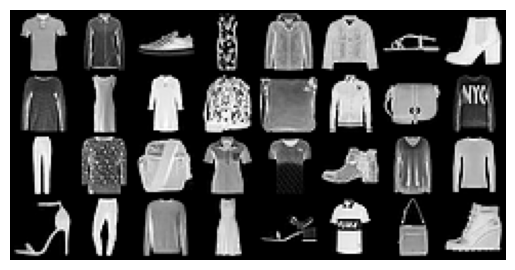

Ground Truth
top        Shirt      Sneaker    Dress      Coat       Coat       Sandal     Ankle boot
Pullover   Dress      Dress      Bag        Bag        Coat       Bag        Pullover  
Trouser    Pullover   Bag        top        top        Ankle boot Pullover   Pullover  
Sandal     Trouser    Pullover   Dress      Sandal     top        Bag        Ankle boot

Predicted
top        Shirt      Sneaker    Trouser    Coat       Coat       Sandal     Ankle boot
Shirt      Dress      Dress      Bag        Bag        Coat       Bag        Pullover  
Trouser    Pullover   Bag        top        top        Ankle boot Pullover   Pullover  
Sandal     Trouser    Pullover   Dress      Sandal     top        Bag        Ankle boot


In [9]:
dataiter = iter(testloader)
images, labels = next(dataiter)

grid_show(images)
print("Ground Truth")
print_grid(labels)

outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print()
print("Predicted")
print_grid(predicted)

Obliczmy dokładności (accuracy) dla zbioru danych.

In [10]:
correct = 0
total = 0

net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 81 %


Skomentuj wyniki:

Dokładność nie wydaje się zbytnio wysoka, ale z drugiej strony pętla ucząca przeszła przez jedynie 5 epok treningowych. Jak na tak "krótkie" uczenie, taka dokładność według mnie wyszła nienajgorzej.

Znając ogólny wynik klasyfikacji dla zbioru przeanalizujmy dokładniej, z którymi klasami jest największy problem.

### Zadanie 3 (1 punkt)

Oblicz dokładność działania sieci (accuracy) dla każdej klasy z osobna. Podczas oceniania skuteczności modelu nie potrzebujemy, aby gradienty się liczyły. Możemy zatem zawrzeć obliczenia w bloku `with torch.no_grad():`

In [11]:
net.eval()

# print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")

# your_code
correct = torch.zeros(len(classes))
total = torch.zeros(len(classes))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        
        _, predicted = torch.max(outputs.data, 1)
        labels = labels.to(device)
        
        for i in range(labels.size(0)):
            total[labels[i]] += 1
            correct[labels[i]] += (predicted[i] == labels[i]).sum().item()

for i in range(len(classes)):
    classname = classes[i]
    accuracy = 100 * correct[i] / total[i]
    
    print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")

Accuracy for class: top   is 87.5 %
Accuracy for class: Trouser is 96.1 %
Accuracy for class: Pullover is 60.9 %
Accuracy for class: Dress is 82.2 %
Accuracy for class: Coat  is 79.1 %
Accuracy for class: Sandal is 88.5 %
Accuracy for class: Shirt is 33.1 %
Accuracy for class: Sneaker is 93.8 %
Accuracy for class: Bag   is 96.3 %
Accuracy for class: Ankle boot is 94.9 %


Skomentuj wyniki:

Są klasy, dla których dokładność jest wysoka (powyżej 90%), mianowicie *Trouser*, *Sneaker*, *Bag*, *Ankle boot*. Wydaje mi się, że ubrania zaliczane do tej klasy są istotnie różne od innych, przez co sieć nie miała z nimi większych kłopotów. Mimo że wśród tej grupy są 2 rodzaje butów, to jednak zwykle takie buty wyglądają inaczej.

Z kolei szczególnia niska dokładność jest dla klas *Pullover* i *Shirt* - są to rodzaje ubrań podobne do siebie (i potencjalnie do niektórych innych), sieć miała z nimi większy problem - dla *Shirt* dokładność wynosi zaledwie 33%!

## Detekcja obiektów

Problem detekcji polega nie tylko na sklasyfikowaniu obiektów na obrazie, ale również wyznaczeniu jego dokładnego położenia w postaci bounding-box-u.
Choć jest to problem odmienny od klasyfikacji obrazów, to w praktyce ściśle z nim powiązany - modele do detekcji obiektów przeważnie do pewnego momentu wyglądają tak samo, jak modele klasyfikacji. Jednak pod koniec sieć jest dzielona na 2 wyjścia: jedno to standardowa klasyfikacja, a drugie to regresor określający pozycję obiektu na obrazie, tzw. bounding box. Najpopularniejszymi przykładami takich sieci są YOLO i Mask R-CNN. Zbiór danych też jest odpowiednio przygotowany do tego zadania i oprócz właściwych zdjęć zawiera również listę bounding-box-ów i ich etykiety.

Zobaczymy, jak działa detekcja na przykładzie już wytrenowanej sieci neuronowej. Autorzy skutecznych sieci często udostępniają ich wagi online, dzięki czemu jeżeli mamy do czynienia z analogicznym problemem jak ten, do którego dana sieć była przygotowana, możemy z niej skorzystać "prosto z pudełka". 

PyTorch pozwala nam na pobranie wytrenowanych wag dla kilku najpopularniejszych modeli. Sprawdzimy, jak z tego skorzystać.

In [12]:
from torchvision.models import detection
import numpy as np
import cv2
from PIL import Image
import urllib

Poniżej znajduje się funkcja pozwalająca wczytać obraz z sieci. Przyda się ona do testowania działania sieci.

In [13]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

Model, którym się zajmiemy to Faster R-CNN, który był trenowany na zbiorze COCO. Poniżej znajduje się lista klas (etykiet) dla tego zbioru danych.

In [14]:
classes = [
    "__background__",
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "street sign",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "hat",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "shoe",
    "eye glasses",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "plate",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "mirror",
    "dining table",
    "window",
    "desk",
    "toilet",
    "door",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "blender",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]

colors = np.random.randint(0, 256, size=(len(classes), 3))

Poniżej inicjalizacja modelu ResNet50-FPN wytrenowanymi wagami. Inicjalizujemy zarówno sieć backbone, jak i RCNN.

In [15]:
model = detection.fasterrcnn_resnet50_fpn(
    weights=detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT,
    weights_backbone=torchvision.models.ResNet50_Weights.DEFAULT,
    progress=True,
    num_classes=len(classes)
).to(device)

model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

IPython, z którego korzystamy w Jupyter Notebooku, ma wbudowaną funkcję `display()` do wyświetlania obrazów. 

Do pobierania obrazów możemy się posłużyć wget-em.

In [16]:
# Pobieranie obrazka z sieci
# !wget https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg --output-document toothbrushes.jpg

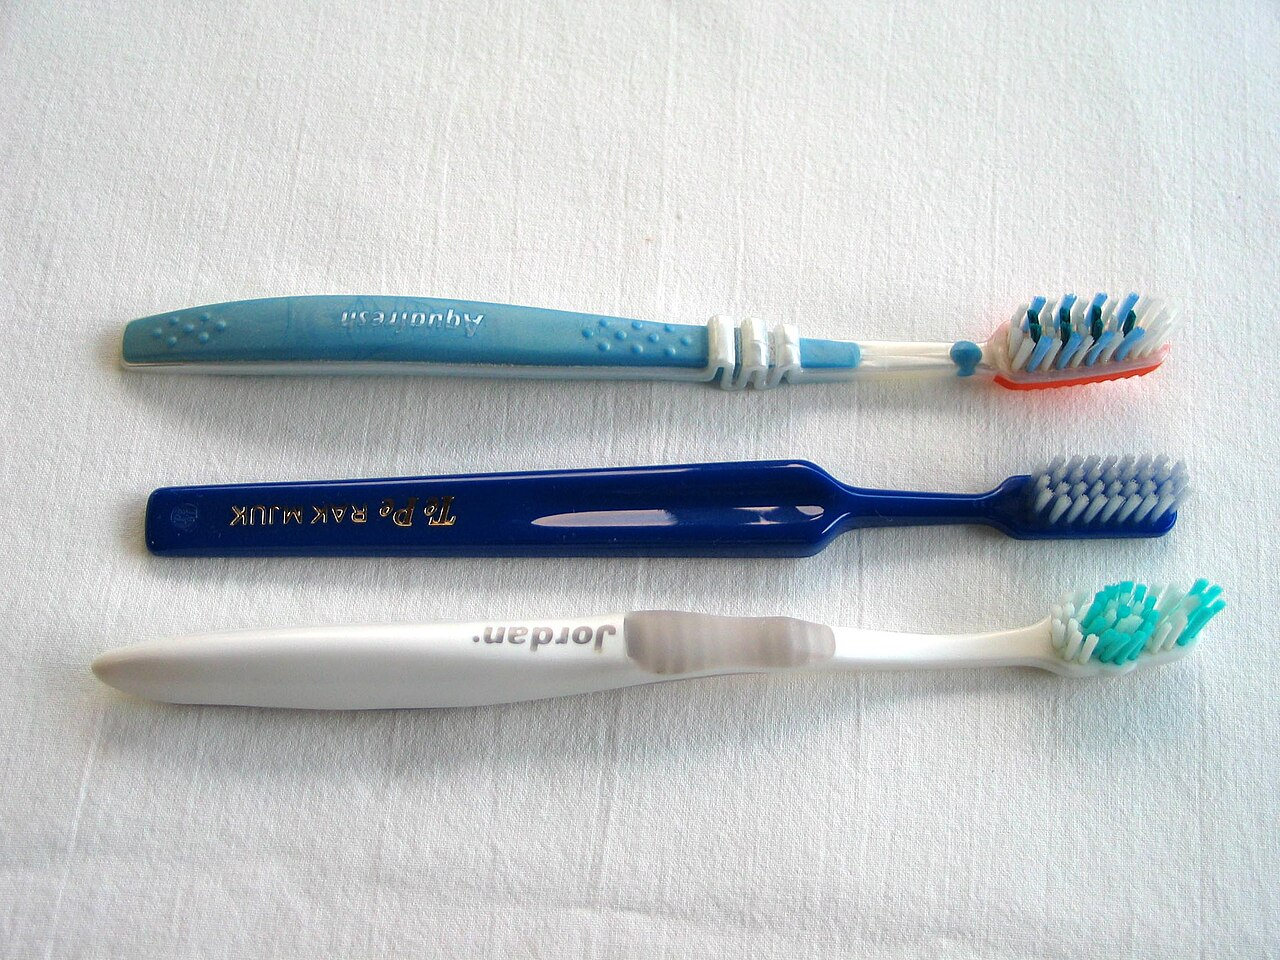

In [17]:
# Wyświetlanie obrazka
image = Image.open("toothbrushes.jpg")

# make sure we have 3-channel RGB, e.g. without transparency
image = image.convert("RGB")
display(image)

PyTorch wymaga obrazów w kształcie [channels, height, width] - (C, H, W) oraz z wartościami pikseli między 0 a 1. Pillow wczytuje obrazy z kanałami (H, W, C) oraz z wartościami pikseli między 0 a 255. Przed wykorzystaniem sieci neuronowej trzeba zatem:
- zamienić obraz na tensor,
- zmienić kolejność kanałów,
- podzielić wartości pikseli przez 255.

In [18]:
image_tensor = torch.from_numpy(np.array(image))
image_tensor = image_tensor.permute(2, 0, 1)
image_tensor_int = image_tensor # useful for displaying, dtype = uint8
image_tensor = image_tensor / 255

image_tensor.shape, image_tensor.dtype

(torch.Size([3, 960, 1280]), torch.float32)

### Zadanie 4 (1 punkt)

Użyj modelu do wykrycia obiektów na obrazie. Następnie wybierz tylko te *bounding boxy*, dla których mamy wynik powyżej 50%. Wypisz te bounding boxy, ich prawdopodobieństwa (w procentach) oraz nazwy klas.

Następnie wykorzystaj wyniki do zaznaczenia bounding box'a dla każdego wykrytego obiektu na obrazie oraz podpisz wykrytą klasę wraz z prawdopodobieństwem. Możesz tutaj użyć:
- [OpenCV](https://stackoverflow.com/questions/56108183/python-opencv-cv2-drawing-rectangle-with-text)
- [PyTorch - Torchvision](https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#visualizing-bounding-boxes)

In [19]:
# your_code
from torchvision.utils import draw_bounding_boxes

image_tensor = image_tensor.to(device)
outputs = model([image_tensor])

boxes_tensors = [] 
scores_tensors = []
labels_tensors = []

score_threshold = .5

for output in outputs:
    boxes_tensors.append(output['boxes'][output['scores'] > score_threshold])
    scores_tensors.append(output['scores'][output['scores'] > score_threshold])
    labels_tensors.append(output['labels'][output['scores'] > score_threshold])
    
print()

for box_tensor, score_tensor, label_tensor in zip(boxes_tensors, scores_tensors, labels_tensors):
    for box, score, label in zip(box_tensor, score_tensor, label_tensor):
        print("Bounding box:", end = " ")
        print(box.cpu().detach().numpy())
        
        print("Prawdopodobieństwo:", end = " ")
        print(f"{score.item():.1%}")
        
        print("Nazwa klasy:", end = " ")
        print(classes[label.item()])
        print()


Bounding box: [ 300.98672  586.82806 1248.8156   716.31177]
Prawdopodobieństwo: 92.0%
Nazwa klasy: toothbrush

Bounding box: [ 120.86037  280.3373  1197.4304   393.86136]
Prawdopodobieństwo: 88.6%
Nazwa klasy: toothbrush

Bounding box: [ 594.94977  455.56378 1183.0688   556.28455]
Prawdopodobieństwo: 68.7%
Nazwa klasy: spoon



In [20]:
import torchvision.transforms.functional as TF

# pomocnicza funkcja, bazująca na opisie z podlinkowanej strony
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    fig.set_size_inches((15, 12))
    
    for i, img in enumerate(imgs):
        img = img.detach()
        img = TF.to_pil_image(img)
        
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

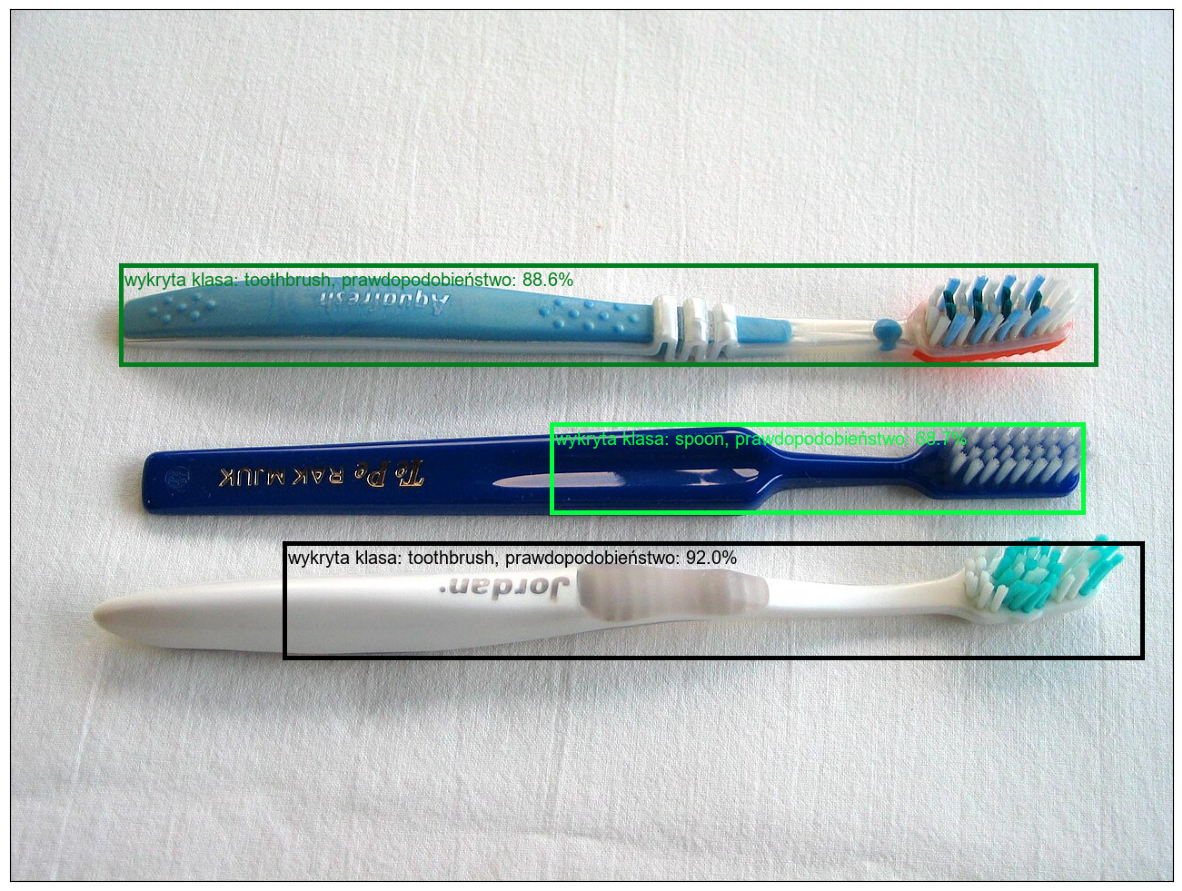

In [21]:
box_labels = []

for score_tensor, label_tensor in zip(scores_tensors, labels_tensors):
    for score, label in zip(score_tensor, label_tensor):
        box_label = f"wykryta klasa: {classes[label.item()]}, prawdopodobieństwo: {score.item():.1%}"
        box_labels.append(box_label)

toothbrushes_boxes = [
    draw_bounding_boxes(
        image_tensor_int, 
        boxes=output['boxes'][output['scores'] > score_threshold], 
        labels=box_labels,
        font="C:\Windows\Fonts\Arial.ttf",
        font_size=20,
        width=5
    )
]

show(toothbrushes_boxes)

## Fine-tuning i pre-trening

Trenowanie głębokich sieci neuronowych do przetwarzania obrazów jest zadaniem wymagającym bardzo dużych zbiorów danych i zasobów obliczeniowych. Często jednak nie musimy trenować takich sieci od nowa, możemy wykorzystać wytrenowane modele i jedynie dostosowywać je do naszych problemów. Działanie takie nazywa się *transfer learningiem*. 

Przykładowo: mamy już wytrenowaną sieć na dużym zbiorze danych (pre-trening) i chcemy, żeby sieć poradziła sobie z nową klasą obiektów (klasyfikacja) albo lepiej radziła sobie z wybranymi obiektami, które już zna (fine-tuning). Możemy usunąć ostatnią warstwę sieci i na jej miejsce wstawić nową, identyczną, jednak z losowo zainicjalizowanymi wagami, a następnie dotrenować sieć na naszym nowym, bardziej specyficznym zbiorze danych. Przykładowo, jako bazę weźmiemy model wytrenowany na zbiorze ImageNet i będziemy chcieli użyć go do rozpoznawania nowych, nieznanych mu klas, np. ras psów.

Dla przećwiczenia takiego schematu działania wykorzystamy zbiór danych z hotdogami. Będziemy chcieli stwierdzić, czy na obrazku jest hotdog, czy nie. Jako sieci użyjemy modelu ResNet-18, pre-trenowanego na zbiorze ImageNet.

In [22]:
# Download the hotdog dataset
# !wget http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
# !unzip -n hotdog.zip

Kiedy korzystamy z sieci pre-trenowanej na zbiorze ImageNet, zgodnie [z dokumentacją](https://pytorch.org/vision/0.8/models.html) trzeba dokonać standaryzacji naszych obrazów, odejmując średnią i dzieląc przez odchylenie standardowe każdego kanału ze zbioru ImageNet.

```
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are
expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229,
0.224, 0.225]. You can use the following transform to normalize:

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

```

In [23]:
torch.manual_seed(17)

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

train_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

test_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

In [24]:
pretrained_net = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)

In [25]:
pretrained_net.fc

Linear(in_features=512, out_features=1000, bias=True)

### Zadanie 5 (1 punkt)

Zastąp wyjściową warstwę liniową naszej fine-tune'owanej sieci nową warstwą o odpowiedniej liczbie wyjść i zainicjuj ją losowymi wartościami.

In [26]:
finetuned_net = pretrained_net # your code here

# your_code
finetuned_net.fc = nn.Linear(
    in_features=pretrained_net.fc.in_features, 
    out_features=2,
    bias=True
)

In [27]:
assert finetuned_net.fc.out_features == 2
print("Solution is correct!")

Solution is correct!


Poniżej znajduje się pętla ucząca, która "dotrenuje" nasz detektor hotdog-ów.

In [28]:
import time
import copy

def train_model(
    model, dataloaders, criterion, optimizer, num_epochs=25
):
    since = time.time()
    val_acc_history = []
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(1, num_epochs + 1):
        print("Epoch {}/{}".format(epoch, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluation mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history only if in training phase
                with torch.set_grad_enabled(phase == "train"):
                    # Get model outputs and calculate loss
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # Backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            
            if phase == "val":
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print("Training complete in {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60))
    print("Best val Acc: {:4f}".format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return model, val_acc_history

Teraz pora na fine-tuning...

In [29]:
import os

data_dir = "hotdog"
batch_size = 32

model_ft = finetuned_net.to(device)

train_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "train"), transform=train_augs
    ),
    batch_size=batch_size,
    shuffle=True,
)

test_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "test"), transform=test_augs
    ),
    shuffle=True,
    batch_size=batch_size,
)

loss = nn.CrossEntropyLoss(reduction="none")

### Zadanie 6 (1 punkt)

Zmodyfikuj tak parametry sieci, aby learning rate dla ostatniej warstwy był 10 razy wyższy niż dla pozostałych.

Trzeba odpowiednio podać pierwszy parametr `torch.optim.SGD` tak, aby zawierał parametry normalne, oraz te z `lr * 10`. Parametry warstw niższych to takie, które mają nazwę inną niż `fc.weight` albo `fc.bias` - może się przydać metoda sieci `named_parameters()`.


In [30]:
def train_fine_tuning(net, learning_rate, num_epochs=15):
    output_params_names = ['fc.weight', 'fc.bias']
    output_params_tuple = list(filter(lambda param: param[0] in output_params_names, net.named_parameters()))
    base_params_tuple = list(filter(lambda param: param[0] not in output_params_names, net.named_parameters()))
    
    output_params = list(param[1] for param in output_params_tuple)
    base_params = list(param[1] for param in base_params_tuple)
    
    # your code here
    trainer = torch.optim.SGD(
        [
            {'params': base_params},
            {'params': output_params, 'lr': learning_rate * 10}
        ], 
        lr=learning_rate, 
        momentum=0.9
    )
    
    dataloaders_dict = {"train": train_iter, "val": test_iter}
    criterion = nn.CrossEntropyLoss()
    
    model_ft, hist = train_model(
        net, dataloaders_dict, criterion, trainer, num_epochs=num_epochs
    )
    return model_ft, hist

In [31]:
model_ft, hist = train_fine_tuning(model_ft, learning_rate=5e-5)

Epoch 1/15
----------
train Loss: 0.5474 Acc: 0.7135
val Loss: 0.3229 Acc: 0.8900

Epoch 2/15
----------
train Loss: 0.3207 Acc: 0.8770
val Loss: 0.2454 Acc: 0.9100

Epoch 3/15
----------
train Loss: 0.2651 Acc: 0.9015
val Loss: 0.2118 Acc: 0.9200

Epoch 4/15
----------
train Loss: 0.2600 Acc: 0.8975
val Loss: 0.1982 Acc: 0.9250

Epoch 5/15
----------
train Loss: 0.2384 Acc: 0.9090
val Loss: 0.1958 Acc: 0.9225

Epoch 6/15
----------
train Loss: 0.2306 Acc: 0.9140
val Loss: 0.1730 Acc: 0.9262

Epoch 7/15
----------
train Loss: 0.2167 Acc: 0.9130
val Loss: 0.1658 Acc: 0.9375

Epoch 8/15
----------
train Loss: 0.1997 Acc: 0.9220
val Loss: 0.1653 Acc: 0.9362

Epoch 9/15
----------
train Loss: 0.2083 Acc: 0.9105
val Loss: 0.1538 Acc: 0.9425

Epoch 10/15
----------
train Loss: 0.2093 Acc: 0.9135
val Loss: 0.1522 Acc: 0.9425

Epoch 11/15
----------
train Loss: 0.2056 Acc: 0.9195
val Loss: 0.1476 Acc: 0.9462

Epoch 12/15
----------
train Loss: 0.2119 Acc: 0.9170
val Loss: 0.1426 Acc: 0.9450

E

Skomentuj wyniki:

Wykorzystanie pretrenowanej sieci dało dobre wyniki już od pierwszej epoki trenującej (co ciekawe, na zbiorze walidacyjnym dokładność wtedy wynosiła prawie 90%). W kolejnych epokach dokładność na zbiorze treningowym i walidacyjnym miała tendencję rosnącą, oscylując wokół wartości 90% i wyższych, a najwyższy wynik na zbiorze walidacyjnym to ponad 94%. Według mnie jest to wysoka dokładność.

Przy wyświetlaniu predykcji sieci musimy wykonać operacje odwrotne niż te, które wykonaliśmy, przygotowując obrazy do treningu:
- zamienić kolejność kanałów z (C, H, W) na (H, W, C),
- zamienić obraz z tensora na tablicę NumPy'a,
- odwrócić normalizację (mnożymy przez odchylenie standardowe, dodajemy średnią) i upewnić się, że nie wychodzimy poza zakres [0, 1] (wystarczy proste przycięcie wartości).

In [32]:
def imshow(img, title=None):
    means = np.array([0.485, 0.456, 0.406])
    stds = np.array([0.229, 0.224, 0.225])
    
    img = img.permute(1, 2, 0).numpy()
    img = stds * img + means
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    if title is not None:
        plt.title(title)
    
    plt.pause(0.001)

In [33]:
import matplotlib.pyplot as plt
plt.ion()  

def visualize_model(model, num_images=6):
    class_names = ["hotdog", "other"]
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_iter):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')

                imshow(inputs.data[j].cpu())

                if images_so_far == num_images:
                    return

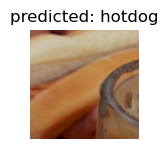

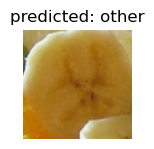

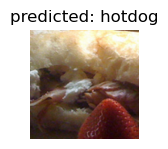

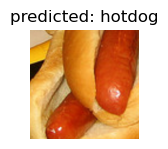

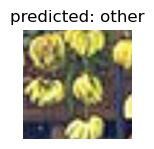

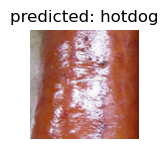

In [34]:
visualize_model(model_ft)

## Zadanie dodatkowe (3 punkty)

W zadaniach dotyczących klasyfikacji obrazu wykorzystywaliśmy prosty zbiór danych i sieć LeNet. Teraz zamień zbiór danych na bardziej skomplikowany, np. [ten](http://www.vision.caltech.edu/datasets/cub_200_2011/) lub [ten](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) (lub inny o podobnym poziomie trudności) i zamiast prostej sieci LeNet użyj bardziej złożonej, np. AlexNet, ResNet, MobileNetV2.



---

Do zadania wybrałem zbiór danych *CUB_200_2011* - pierwszy z wyżej wskazanych. Używam sieci **AlexNet** z biblioteki `torchvision.models`. Wykorzystuję inspirację [tym notebookiem na Kaggle'u](https://www.kaggle.com/code/wenewone/transfer-learning-example-on-cub-200-2011-dataset), który przedstawia przykładową pracę z tym zbiorem danych.

In [35]:
# ustawienie argumentów używanych w późniejszej części
batch_size = 32
split_ratio = 0.8
random_seed = 17
num_classes = 200

# względna ścieżka do katalogu z danymi
root_dir = './CUB_200_2011'

# ścieżka do katalogu z obrazkami
images_dir = 'images'

# nazwy plików z opisem danych
images_desc = 'images.txt'
labels_desc = 'image_class_labels.txt'
split_desc = 'train_test_split.txt'

In [36]:
import os
import pandas as pd

# klasa odpowiedzialna za wczytanie odpowiednich danych - treningowych / walidacyjnych
class CUB():
    def __init__(self, root, dataset_type, train_ratio, valid_seed, transform, target_transform=None):
        self.root = root
        self.transform = transform
        self.target_transform = target_transform

        df_img = pd.read_csv(os.path.join(root, images_desc), sep=' ', header=None, names=['ID', 'Image'], index_col=0)
        df_label = pd.read_csv(os.path.join(root, labels_desc), sep=' ', header=None, names=['ID', 'Label'], index_col=0)
        df_split = pd.read_csv(os.path.join(root, split_desc), sep=' ', header=None, names=['ID', 'Train'], index_col=0)
        df = pd.concat([df_img, df_label, df_split], axis=1)
        
        # relabel - chcemy indeksować od zera
        df['Label'] = df['Label'] - 1

        # split data
        if dataset_type == 'test': # dane testowe
            df = df[df['Train'] == 0]
        elif dataset_type == 'train' or dataset_type == 'valid': # dane treningowe / walidacyjne
            df = df[df['Train'] == 1]
            
            # random split: train, valid
            if train_ratio != 1:
                np.random.seed(valid_seed)
                indices = list(range(len(df)))
                np.random.shuffle(indices)
                split_idx = int(len(indices) * train_ratio) + 1
            
            if dataset_type == 'train':
                df = df.iloc[indices[:split_idx]]
            else: # dataset_type == 'valid'
                df = df.iloc[indices[split_idx:]]
        
        self.img_name_list = df['Image'].tolist()
        self.label_list = df['Label'].tolist()
        
        # konwersja do RGB
        self.convert2rgb()

    def __len__(self):
        return len(self.label_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root, images_dir, self.img_name_list[idx])
        image = Image.open(img_path)
        target = self.label_list[idx]
        
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            target = self.target_transform(target)
        
        return image, target

    def convert2rgb(self):
        for i, img_name in enumerate(self.img_name_list):
            img_path = os.path.join(self.root, images_dir, img_name)
            image = Image.open(img_path)
            color_mode = image.mode
            
            if color_mode != 'RGB':
                image = image.convert('RGB')
                image.save(img_path.replace('.jpg', '_rgb.jpg'))
                self.img_name_list[i] = img_name.replace('.jpg', '_rgb.jpg')

In [37]:
# standaryzacja obrazów, jako że korzystam z sieci pretrenowanej na ImageNet
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

trans_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224, scale=(0.7, 1), ratio=(3 / 4, 4 / 3)),
    transforms.ToTensor(),
    normalize
])

trans_test = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])

In [38]:
train_data = CUB(root_dir, 'train', split_ratio, random_seed, transform=trans_train)
valid_data = CUB(root_dir, 'valid', split_ratio, random_seed, transform=trans_test)

print(f"Training set elements: {len(train_data)}")
print(f"Validate set elements: {len(valid_data)}")

Training set elements: 4796
Validate set elements: 1198


In [39]:
# pokazywanie paru początkowych obrazków wraz z ich labelem
# bazuje na funkcji imshow bezpośrednio sprzed tego zadania
def show_samples(images, labels, num_images=6):
    images_so_far = 0
    fig = plt.figure()

    for i in range(len(images)):
        images_so_far += 1
        
        ax = plt.subplot(num_images // 2, 2, images_so_far)
        ax.axis('off')
        ax.set_title(f'Image label: {labels[i]}')

        imshow(images[i])

        if images_so_far == num_images:
            return

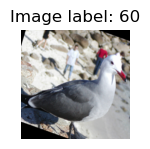

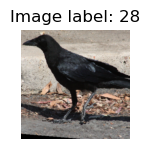

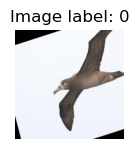

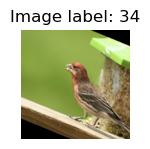

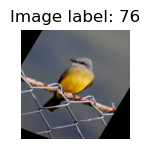

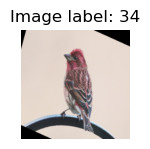

In [40]:
from torch.utils import data

train_loader = data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
images, labels = next(iter(train_loader))
show_samples(images[0 : 6], labels[0 : 6])

In [41]:
# pretrenowana sieć AlexNet
pretrained_net = torchvision.models.alexnet(weights=torchvision.models.AlexNet_Weights.IMAGENET1K_V1)
pretrained_net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [42]:
pretrained_net.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [43]:
# finetuning sieci - zamiana ostatniej warstwy w .classifier
finetuned_net = pretrained_net

finetuned_net.classifier = nn.Sequential(
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=9216, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=4096, out_features=num_classes, bias=True)
)

finetuned_net.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [44]:
# funkcja do obliczania dokładności
def accuracy(model, data_loader, N=None):
    correct = 0
    model.eval()
    
    if N == None:
        N = len(data_loader.dataset)
    
    training = model.training
    if training:
        model.eval()
      
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            
    if training:
        model.train()        
    
    acc = correct / N
    return acc

In [45]:
# główna funkcja, odpowiedzialna za trening sieci
def train(model, train_loader, valid_loader, criterion, optimizer, scheduler, max_epoch, test_period):
    N_train = len(train_loader.dataset)
    N_valid = len(valid_loader.dataset)
    best_acc = 0

    model.train()

    for epoch in range(max_epoch):
        train_correct = 0
        
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            
            optimizer.step()
            optimizer.zero_grad()
            
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == labels).sum().item()
        
        scheduler.step()
        train_acc = train_correct / N_train

        # wypisanie wyników dla zbioru treningowego i walidacyjnego
        if epoch % test_period == 0:
            acc = accuracy(model, valid_loader, N_valid)
            
            if acc > best_acc:
                best_acc = acc
                
            print(f"Epoch {epoch:3d} --- train loss: {loss.item():.4f}\ttrain accuracy: {train_acc:.4f}\tvalid accuracy: {acc:.4f}")

    # dokładności po treningu
    final_acc = accuracy(model, valid_loader)
    print('\nFinal accuracies:')
    print(f"train accuracy: {train_acc:.4f}\tvalid accuracy: {final_acc:.4f}\tbest valid accuracy: {best_acc:.4f}")

In [46]:
# hiperparametry
init_lr = 1e-4
weight_decay = 5e-5
max_epoch = 30
test_period = 1

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(finetuned_net.classifier.parameters(), lr=init_lr, betas=(0.9, 0.999), weight_decay=weight_decay)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=max_epoch, eta_min=0)

train_loader = data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
valid_loader = data.DataLoader(valid_data, batch_size=batch_size, shuffle=False)

train(finetuned_net, train_loader, valid_loader, criterion, optimizer, scheduler, max_epoch, test_period)

Epoch   0 --- train loss: 4.5630	train accuracy: 0.0315	valid accuracy: 0.0902
Epoch   1 --- train loss: 2.6458	train accuracy: 0.2166	valid accuracy: 0.2830
Epoch   2 --- train loss: 1.6434	train accuracy: 0.3974	valid accuracy: 0.3331
Epoch   3 --- train loss: 1.8133	train accuracy: 0.5307	valid accuracy: 0.3773
Epoch   4 --- train loss: 1.3369	train accuracy: 0.6147	valid accuracy: 0.4290
Epoch   5 --- train loss: 1.1938	train accuracy: 0.6822	valid accuracy: 0.4633
Epoch   6 --- train loss: 1.1660	train accuracy: 0.7429	valid accuracy: 0.4382
Epoch   7 --- train loss: 0.9425	train accuracy: 0.7961	valid accuracy: 0.4633
Epoch   8 --- train loss: 0.6339	train accuracy: 0.8296	valid accuracy: 0.4583
Epoch   9 --- train loss: 0.5346	train accuracy: 0.8736	valid accuracy: 0.4541
Epoch  10 --- train loss: 0.6333	train accuracy: 0.8922	valid accuracy: 0.4833
Epoch  11 --- train loss: 0.1770	train accuracy: 0.9145	valid accuracy: 0.4633
Epoch  12 --- train loss: 0.2211	train accuracy: 0.9

In [47]:
test_data = CUB(root_dir, 'test', split_ratio, random_seed, transform=trans_test)
test_loader = data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
test_acc = accuracy(finetuned_net, test_loader, len(test_data))

print(f"Accuracy on test set: {test_acc:.4f}")

Accuracy on test set: 0.5324


#### Komentarz do wyników

Zapewne przez "trudniejszy" zbiór danych i zadanie klasyfikacji dla wielu klas, początkowe wyniki (w pierwszych epokach) były bardzo niskie, ale już od epoki nr 11 dokładność na zbiorze treningowym wynosiła powyżej 90%. Niestety, w przypadku zbioru walidacyjnego dokładność jest o wiele niższa, najlepsza wynosi zaledwie około 52%. Odbija się to także na zbiorze testowym - tam dokładność jest nieco powyżej 53%.

Wnioskuję, że doszło do przeuczenia, zapewne można dobrać lepiej wartości hiperparametrów, żeby temu zapobiec.
Niestety z powodu braku czasu i długiego czasu obliczeń nie miałem okazji przetestować wielu kombinacji wartości hiperparametrów, to jest najlepsza przeze mnie znaleziona.